# Mandelbrot Set

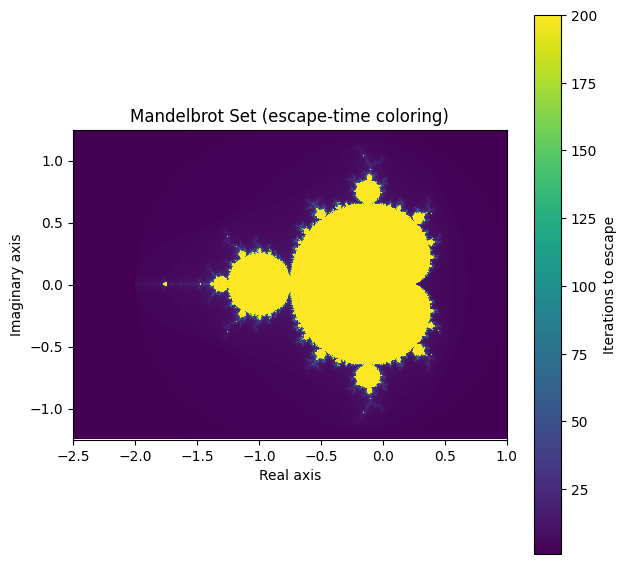

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Pick the rectangle of the complex plane we want to see
xmin, xmax = -2.5, 1.0
ymin, ymax = -1.25, 1.25

# 2) Image resolution (make these bigger for more detail, smaller for speed)
width, height = 600, 600

# 3) Iteration limit: higher = more detail, more compute
max_iter = 200

# 4) Build a grid of complex numbers: C = X + iY
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)           # X and Y are 2D arrays
C = X + 1j * Y                     # complex grid

# 5) Prepare arrays to iterate
Z = np.zeros_like(C, dtype=np.complex128)  # start z=0 for all points
escape_counts = np.zeros(C.shape, dtype=np.int32)  # store "when it escaped"
mask = np.ones(C.shape, dtype=bool)        # True = still alive (not escaped yet)

# 6) Escape-time iteration
for i in range(1, max_iter + 1):
    # Only update points that have not escaped yet
    Z[mask] = Z[mask] * Z[mask] + C[mask]

    # Points that just escaped this round
    escaped_now = (np.abs(Z) > 2) & mask

    # Record the iteration at which they escaped
    escape_counts[escaped_now] = i

    # Remove them from further computation
    mask[escaped_now] = False

    # If everything escaped (rare), stop early
    if not mask.any():
        break

# 7) For points that never escaped, set their value to max_iter (they are "inside")
escape_counts[escape_counts == 0] = max_iter

# 8) Show the result
plt.figure(figsize=(7, 7))
plt.imshow(
    escape_counts,
    extent=[xmin, xmax, ymin, ymax],  # map pixels back to complex plane coords
    origin="lower",
    interpolation="nearest",
)
plt.title("Mandelbrot Set (escape-time coloring)")
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.colorbar(label="Iterations to escape")
plt.show()
